# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
df = pd.ExcelFile("TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx")

In [7]:
print (df.sheet_names)

['INFO', 'Existing employees', 'Employees who have left', 'Presentation']


In [8]:
df1 = df.parse('Existing employees')
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low


In [9]:
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low


In [10]:
df2 = df.parse('Employees who have left')
df2

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3566,14995.0,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
3567,14996.0,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
3568,14997.0,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
3569,14998.0,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


In [11]:
#to counts total number of employees who have left by department
df2['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

Text(0.5, 0, 'Left')

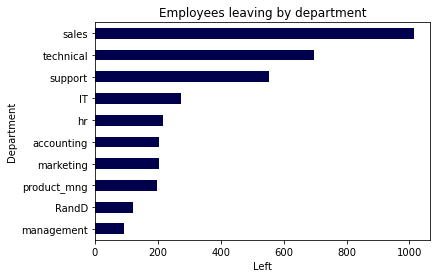

In [12]:
#employees leaving by department.
df2['dept'].value_counts().nsmallest(12).plot(kind = 'barh',cmap = 'seismic', grid = False)
plt.title('Employees leaving by department')
plt.ylabel('Department')
plt.xlabel('Left')

In [13]:
#Employees leavin by salary
count = df2['salary'].value_counts()
count

low       2172
medium    1317
high        82
Name: salary, dtype: int64

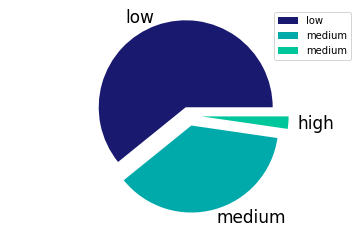

In [14]:
count = df2['salary'].value_counts()
plt.axis('equal')
explode = (0.1, 0.12, 0.15)
colors = ['#191970','#00AAAA','#00C69C']
count.plot(kind='pie', fontsize=17,colors=colors,explode=explode)
plt.ylabel(' ')
plt.legend(labels=df2.salary,loc="best")

plt.show()

satisfaction= df2.groupby(
     ['dept','salary']
 ).agg(
     mean_satisfaction = ('satisfaction_level','mean'),
     min_satisfaction     = ('satisfaction_level',   'min'),
     max_satisfaction     = ('satisfaction_level',   'max')
 ).reset_index()

print(satisfaction)

In [16]:
satisfaction= df2.groupby(
     ['dept','salary']
 ).agg(
     mean_satisfaction = ('satisfaction_level','mean'),
 ).reset_index()

print(satisfaction)

           dept  salary  mean_satisfaction
0            IT    high           0.582500
1            IT     low           0.428314
2            IT  medium           0.375670
3         RandD    high           0.347500
4         RandD     low           0.470182
5         RandD  medium           0.405161
6    accounting    high           0.322000
7    accounting     low           0.393333
8    accounting  medium           0.415800
9            hr    high           0.265000
10           hr     low           0.476848
11           hr  medium           0.407863
12   management    high           0.420000
13   management     low           0.467627
14   management  medium           0.337742
15    marketing    high           0.423333
16    marketing     low           0.443175
17    marketing  medium           0.475588
18  product_mng    high           0.326667
19  product_mng     low           0.485810
20  product_mng  medium           0.487126
21        sales    high           0.447143
22        s